In [29]:
import numpy as np
import pandas as pd
import plotly.express as px           
import plotly.graph_objects as go     
import matplotlib.pyplot as plt 
import plotly as py 
from plotly import tools 
import os
import seaborn as sns

In [3]:
crop=pd.read_csv("Downloads\\Crop Production data.csv")

In [4]:
crop

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[246091 rows x 7 columns]

In [14]:
crop.shape

(246091, 7)

In [5]:
crop.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In [6]:
crop.tail()

State_Name District_Name  Crop_Year       Season       Crop  \
246086  West Bengal       PURULIA       2014  Summer            Rice   
246087  West Bengal       PURULIA       2014  Summer         Sesamum   
246088  West Bengal       PURULIA       2014  Whole Year   Sugarcane   
246089  West Bengal       PURULIA       2014  Winter            Rice   
246090  West Bengal       PURULIA       2014  Winter         Sesamum   

            Area  Production  
246086     306.0       801.0  
246087     627.0       463.0  
246088     324.0     16250.0  
246089  279151.0    597899.0  
246090     175.0        88.0

In [13]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [18]:
crop.dropna(inplace=True)

In [19]:
crop.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [8]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
crop.describe()

Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09

In [16]:
crop.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [23]:
crop['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [20]:
# using loops to categorize crops

def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

In [24]:
#creating new categorize crop column

crops = crop['Crop']
crop['cat_crop']=crop['Crop'].apply(cat_crop)

In [25]:
crop1=pd.crosstab(crop['State_Name'],crop['cat_crop'])

In [26]:
crop1

cat_crop                     Beans  Cereal  Commercial  Fruits  Nuts  Pulses  \
State_Name                                                                     
Andaman and Nicobar Islands      0      20          15      16    37       9   
Andhra Pradesh                 386    2264         474     502   674    1336   
Arunachal Pradesh               26    1021         168       0    26      67   
Assam                            0    2952         854     920   400    2234   
Bihar                          280    6108         756     226   130    3731   
Chandigarh                       0      39           0       0     0      14   
Chhattisgarh                   646    1805         316     264   261    2087   
Dadra and Nagar Haveli           0     116          12       9     9      64   
Goa                              0      62          22      16    47      32   
Gujarat                        403    2466         372     157   683    1521   
Haryana                        108    1427         259      52   126     860   
Himachal Pradesh               179     726          67       0    54     530   
Jammu and Kashmir               12     562          42      24     7     307   
Jharkhand                        0     575          16       0     0     304   
Karnataka                     1096    5295         615     598  1470    2776   
Kerala                           3     819         236     437   536      13   
Madhya Pradesh                 962    5115         826     659   768    3993   
Maharashtra                    477    4009         458      83   868    2326   
Manipur                         31     151          40     228     4     160   
Meghalaya                      113     606         182     162   143     314   
Mizoram                         42     230         123       0    15     213   
Nagaland                       211    1054         160       0   144     873   
Odisha                         629    3871         607       0  1156    1760   
Puducherry                       0     198          30      73    98     101   
Punjab                         104    1123         216       0    75     728   
Rajasthan                      871    2634         518     257   444    2174   
Sikkim                          72     391           0       8     0     136   
Tamil Nadu                     479    2680         623     992  1076    1466   
Telangana                      259    1365         250     201   338     882   
Tripura                          0     240          80       0   119     469   
Uttar Pradesh                 1112    9719        1741     269   958    6549   
Uttarakhand                    360    1423         127       0    76    1236   
West Bengal                    254    2217         356       0   730    1633   

cat_crop                     Vegetables  fibres  oilseeds  spices  
State_Name                                                         
Andaman and Nicobar Islands          20       0        11      52  
Andhra Pradesh                     1046     333      1101     802  
Arunachal Pradesh                   257       0       343     637  
Assam                              1781    1284      2097    1338  
Bihar                              1775     924      2504    1396  
Chandigarh                           26       0         7       0  
Chhattisgarh                       1143     535      1496    1288  
Dadra and Nagar Haveli                0      13        30       1  
Goa                                   0       0         0      12  
Gujarat                             473     327      1029     512  
Haryana                             463     257       543     248  
Himachal Pradesh                    214      37       236     345  
Jammu and Kashmir                   196      44       233     115  
Jharkhand                           247       0       124       0  
Karnataka                          1763     605      3135    2588  
Kerala                              636    

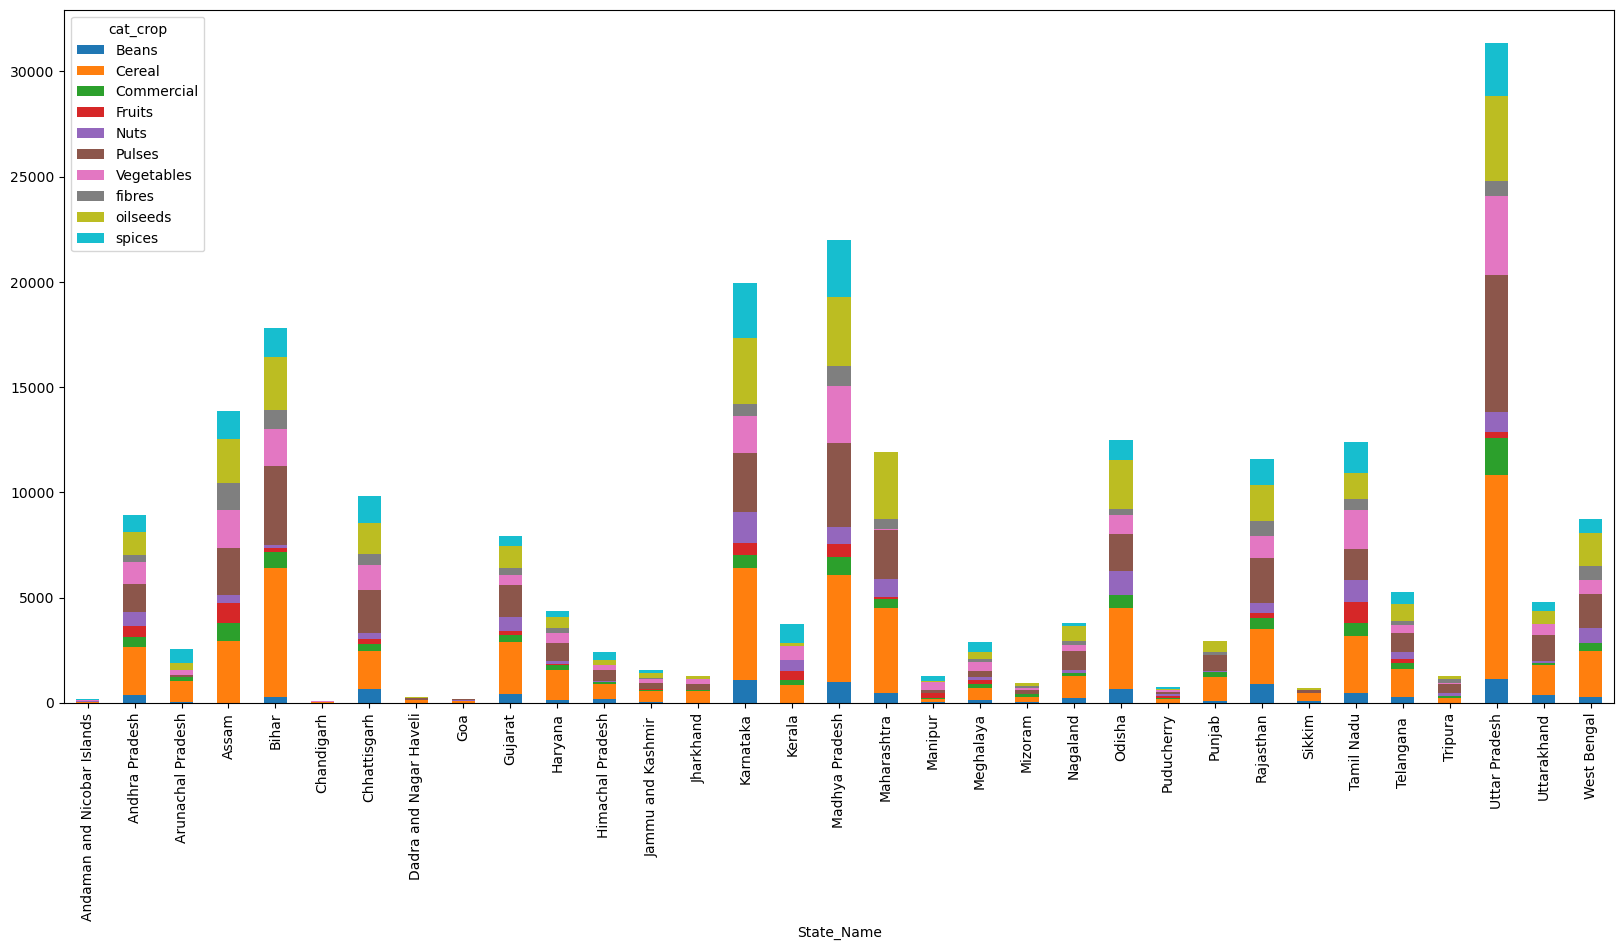

In [27]:
crop1.plot(kind='bar',stacked=True,figsize = (20,9));

In [ ]:
#from the above bar graph we can say that UTTAR PRADESH is dominating in crop production with different crop categories by comparing with other states

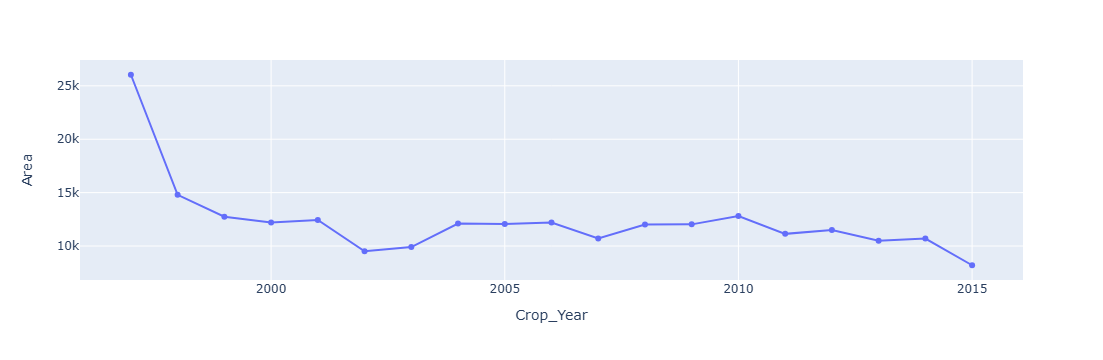

In [30]:
data= crop.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.line(data, 'Crop_Year', 'Area', markers = True)

In [31]:
#Here,in the period of 1997-2000 occurred a massive dip in the area under cultivation

In [34]:
crop2=crop[crop['cat_crop']=='Commercial']

In [35]:
crop2

State_Name District_Name  Crop_Year       Season  \
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
26      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
60      Andaman and Nicobar Islands      NICOBARS       2006  Whole Year    
65      Andaman and Nicobar Islands      NICOBARS       2010  Autumn        
...                             ...           ...        ...          ...   
245953                  West Bengal       PURULIA       2010  Whole Year    
245984                  West Bengal       PURULIA       2011  Whole Year    
246016                  West Bengal       PURULIA       2012  Whole Year    
246051                  West Bengal       PURULIA       2013  Whole Year    
246088                  West Bengal       PURULIA       2014  Whole Year    

             Crop   Area  Production    cat_crop  
7       Sugarcane    1.0        2.00  Commercial  
16      Sugarcane    1.0        1.00  Commercial  
26      Sugarcane    5.0       40.00  Commercial  
60      Sugarcane    0.2        0.50  Commercial  
65      Sugarcane   13.4       41.75  Commercial  
...           ...    ...         ...         ...  
245953  Sugarcane  303.0    11541.00  Commercial  
245984  Sugarcane  303.0    20264.00  Commercial  
246016  Sugarcane  314.0    11199.00  Commercial  
246051  Sugarcane  161.0     7948.00  Commercial  
246088  Sugarcane  324.0    16250.00  Commercial  

[10561 rows x 8 columns]

In [38]:
crop2['Crop'].unique()

array(['Sugarcane', 'Tobacco', 'Rubber', 'Tea', 'Coffee'], dtype=object)

In [41]:
counts=crop2['Crop'].value_counts()

In [42]:
counts

Crop
Sugarcane    7827
Tobacco      2637
Tea            62
Rubber         29
Coffee          6
Name: count, dtype: int64

In [43]:
#hre,Sugarcane production is more commercial,but we can see in the quiz tobacco is also a most commercial crop in India.

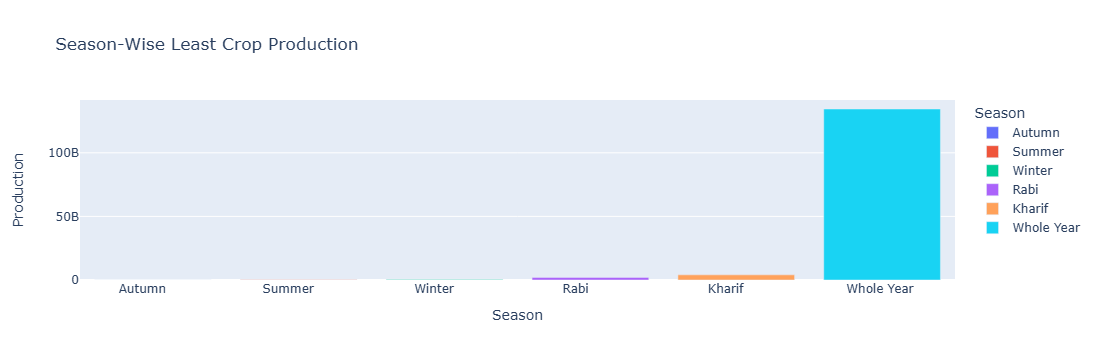

In [45]:
crop3 = crop.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(crop3, 'Season', 'Production', color='Season',title = 'Season-Wise Least Crop Production')

In [46]:
#In Autumn,Summer and winter has very less production.But,most of the times in Autumn crop production is nill. 

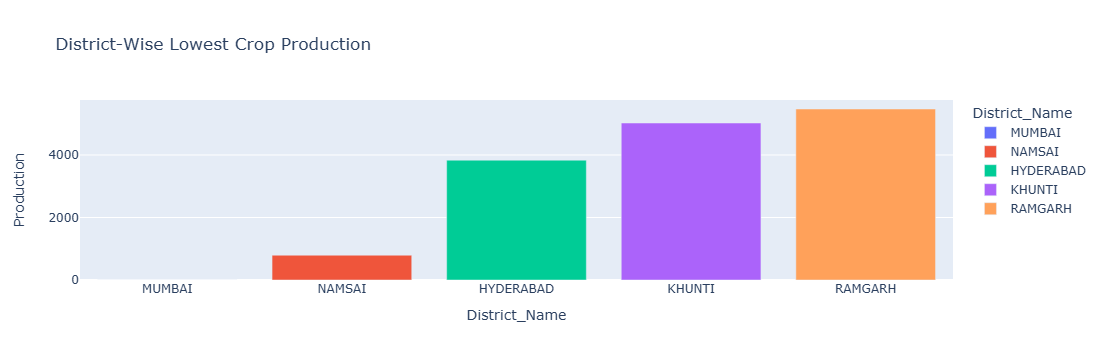

In [47]:
crop4 = crop.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').head()
px.bar(crop4, 'District_Name', 'Production',color='District_Name',title = 'District-Wise Lowest Crop Production' )

In [48]:
#We can clearly say that MUMBAI is the only country which has very lowest crop production District.

In [50]:
sugarcane=crop[crop['Crop']=='Sugarcane']

In [51]:
sugarcane

State_Name District_Name  Crop_Year       Season  \
7       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
16      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
26      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
60      Andaman and Nicobar Islands      NICOBARS       2006  Whole Year    
65      Andaman and Nicobar Islands      NICOBARS       2010  Autumn        
...                             ...           ...        ...          ...   
245953                  West Bengal       PURULIA       2010  Whole Year    
245984                  West Bengal       PURULIA       2011  Whole Year    
246016                  West Bengal       PURULIA       2012  Whole Year    
246051                  West Bengal       PURULIA       2013  Whole Year    
246088                  West Bengal       PURULIA       2014  Whole Year    

             Crop   Area  Production    cat_crop  
7       Sugarcane    1.0        2.00  Commercial  
16      Sugarcane    1.0        1.00  Commercial  
26      Sugarcane    5.0       40.00  Commercial  
60      Sugarcane    0.2        0.50  Commercial  
65      Sugarcane   13.4       41.75  Commercial  
...           ...    ...         ...         ...  
245953  Sugarcane  303.0    11541.00  Commercial  
245984  Sugarcane  303.0    20264.00  Commercial  
246016  Sugarcane  314.0    11199.00  Commercial  
246051  Sugarcane  161.0     7948.00  Commercial  
246088  Sugarcane  324.0    16250.00  Commercial  

[7827 rows x 8 columns]

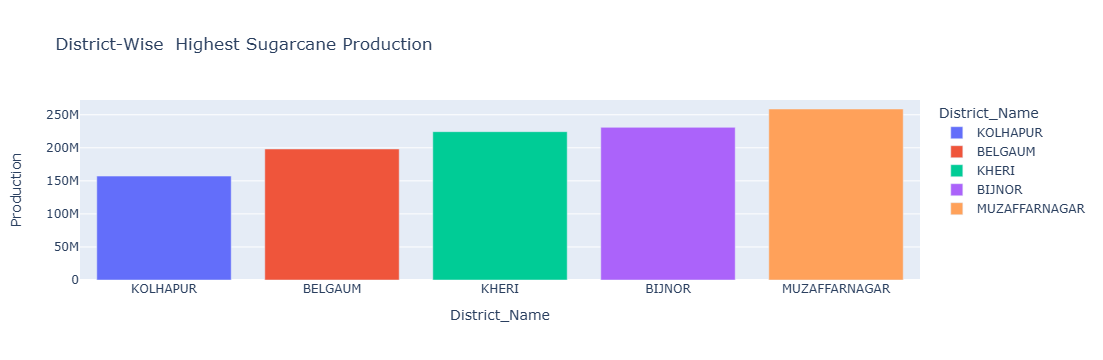

In [62]:
crop5=sugarcane.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').tail()
px.bar(crop5, 'District_Name', 'Production',color='District_Name',title = 'District-Wise  Highest Sugarcane Production' )

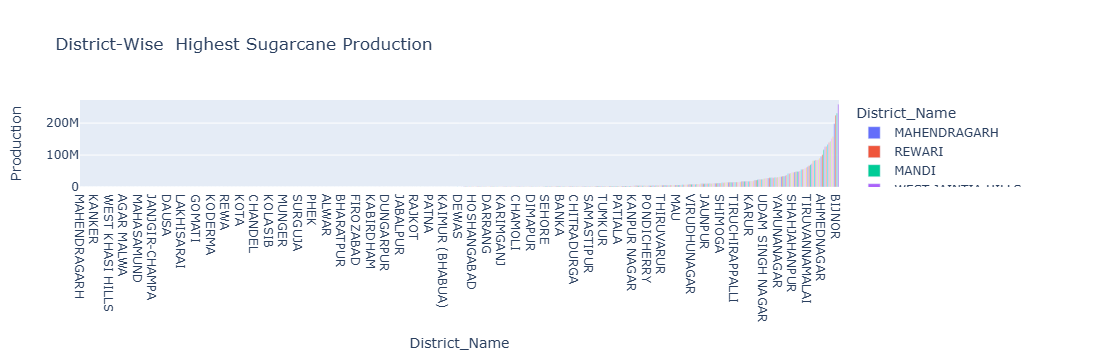

In [63]:
crop5=sugarcane.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(crop5, 'District_Name', 'Production',color='District_Name',title = 'District-Wise  Highest Sugarcane Production' )

In [54]:
#MUZAFFARNAGAR is producing more sugarcane than other districts .

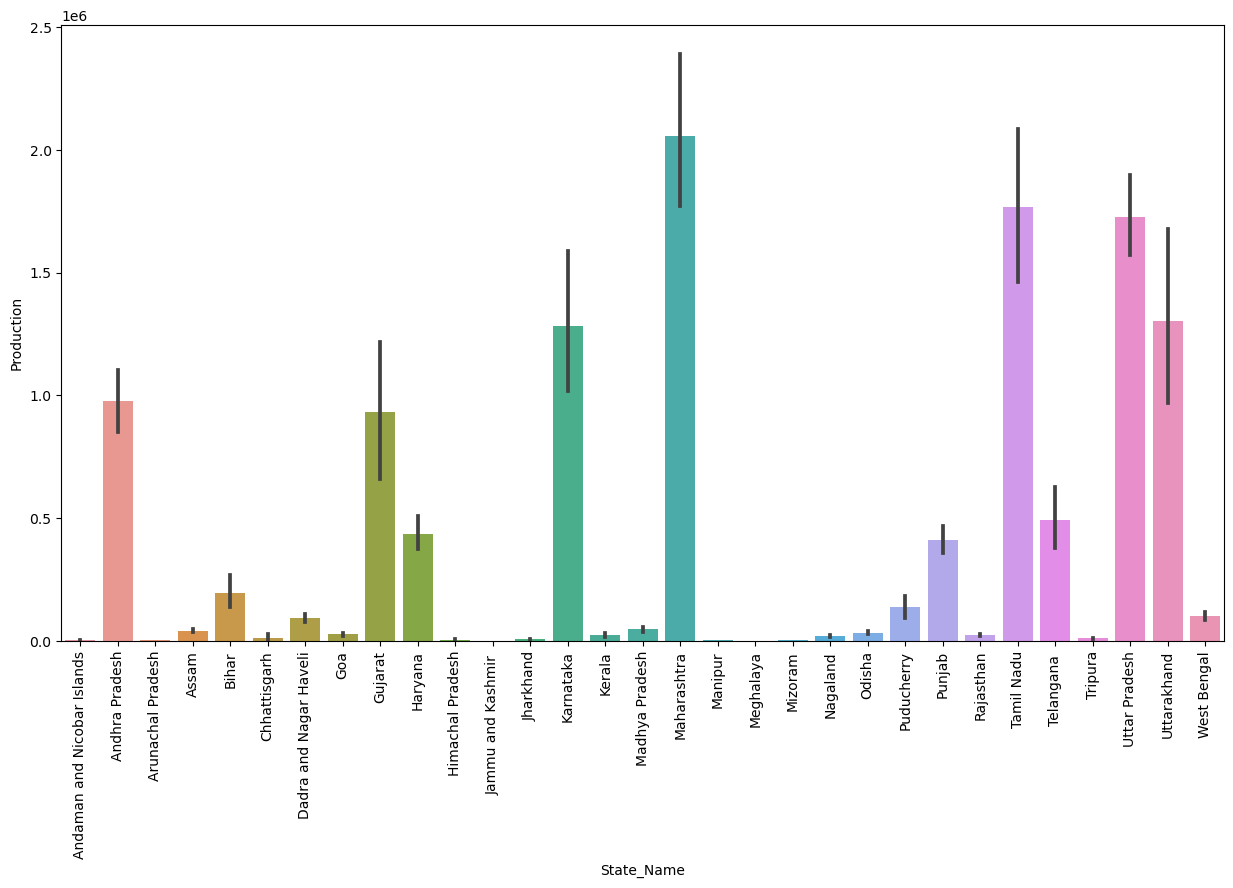

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(x = "State_Name", y = "Production",data=sugarcane)
plt.xticks(rotation=90)
plt.show()

In [65]:
#Maharashtra is the state which is largest producer of the sugarcane.

In [68]:
import warnings
warnings.filterwarnings('ignore')

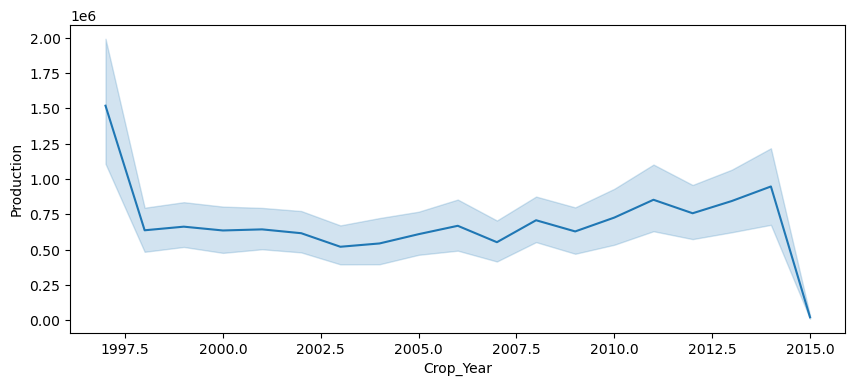

In [69]:
plt.figure(figsize=(10,4))
sns.lineplot(data=sugarcane,x='Crop_Year',y='Production');

In [70]:
#In the year 2014 sugarcane production is more.

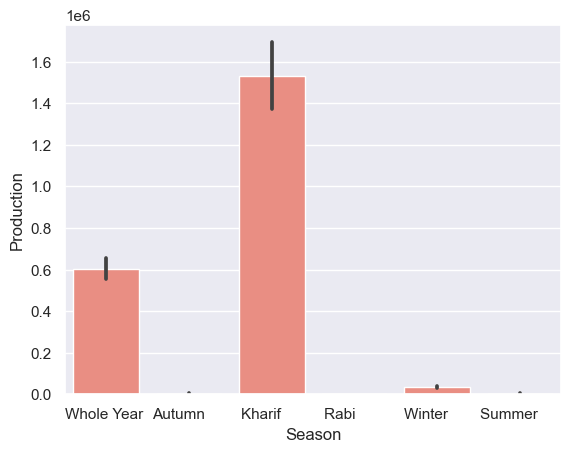

In [71]:
sns.set()
sns.barplot(x= "Season",y="Production",data=sugarcane,color='salmon');

In [72]:
#sugarcane is more produced in Kharif season.

In [73]:
rice=crop[crop['Crop']=='Rice']

In [74]:
rice

State_Name District_Name  Crop_Year       Season  \
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
12      Andaman and Nicobar Islands      NICOBARS       2001  Kharif        
18      Andaman and Nicobar Islands      NICOBARS       2002  Kharif        
27      Andaman and Nicobar Islands      NICOBARS       2003  Kharif        
36      Andaman and Nicobar Islands      NICOBARS       2004  Kharif        
...                             ...           ...        ...          ...   
246049                  West Bengal       PURULIA       2013  Summer        
246052                  West Bengal       PURULIA       2013  Winter        
246058                  West Bengal       PURULIA       2014  Autumn        
246086                  West Bengal       PURULIA       2014  Summer        
246089                  West Bengal       PURULIA       2014  Winter        

        Crop       Area  Production cat_crop  
2       Rice     102.00      321.00   Cereal  
12      Rice      83.00      300.00   Cereal  
18      Rice     189.20      510.84   Cereal  
27      Rice      52.00       90.17   Cereal  
36      Rice      52.94       72.57   Cereal  
...      ...        ...         ...      ...  
246049  Rice     516.00     1274.00   Cereal  
246052  Rice  302274.00   730136.00   Cereal  
246058  Rice     264.00      721.00   Cereal  
246086  Rice     306.00      801.00   Cereal  
246089  Rice  279151.00   597899.00   Cereal  

[15082 rows x 8 columns]

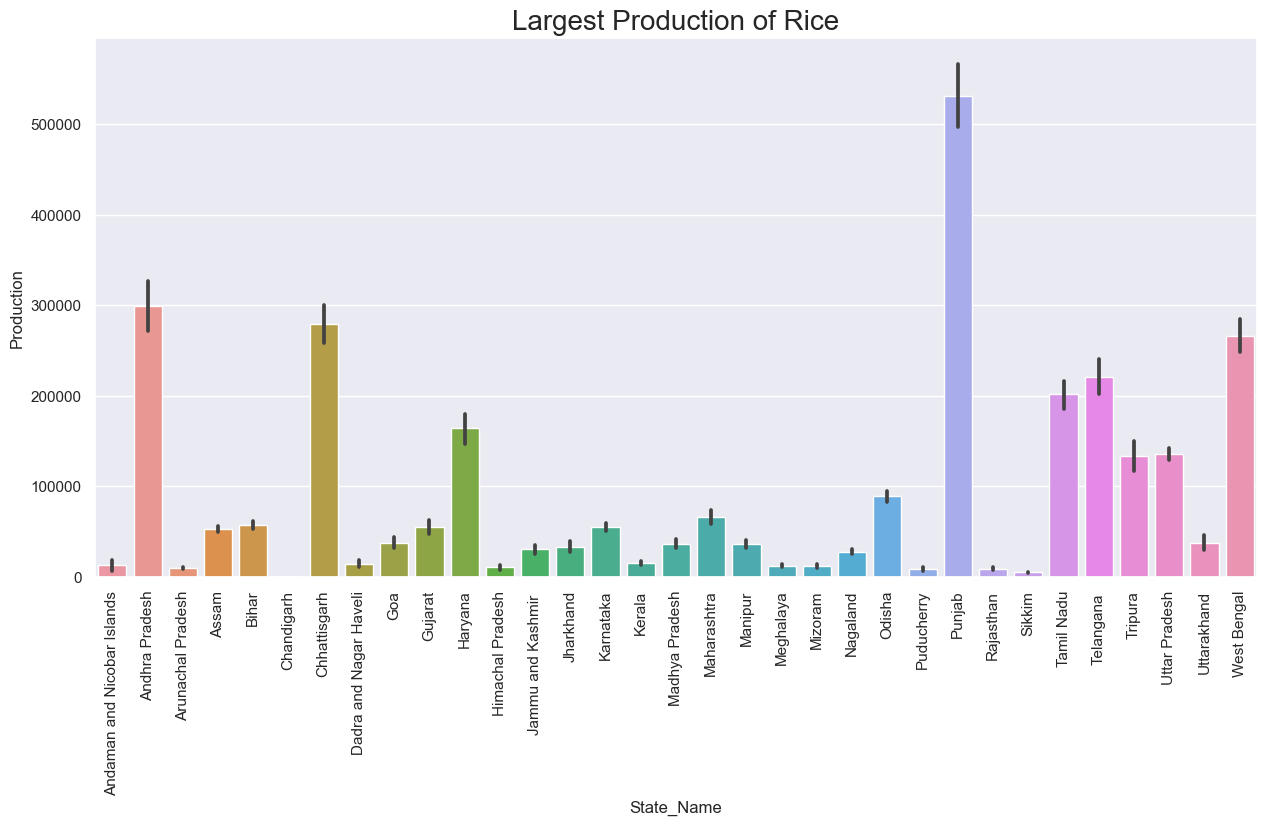

In [75]:
plt.figure(figsize=(15,7))
sns.barplot(x= "State_Name",y = "Production",data=rice);
plt.xticks(rotation=90)
plt.title("Largest Production of Rice",fontsize=20)
plt.show()


In [76]:
#The largest production of rice is produced by Punjab state.

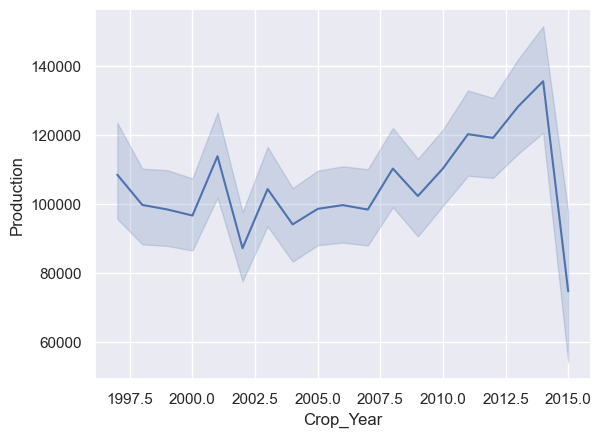

In [77]:
sns.set()
sns.lineplot(data=rice,x='Crop_Year',y='Production');

In [78]:
#In the year 2014 production of rice is increased.

In [79]:
coconut=crop[crop["Crop"]=="Coconut "]

In [80]:
coconut

State_Name District_Name  Crop_Year       Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
32      Andaman and Nicobar Islands      NICOBARS       2003  Whole Year    
41      Andaman and Nicobar Islands      NICOBARS       2004  Whole Year    
...                             ...           ...        ...          ...   
245719                  West Bengal       PURULIA       2004  Whole Year    
245756                  West Bengal       PURULIA       2005  Whole Year    
245792                  West Bengal       PURULIA       2006  Whole Year    
245837                  West Bengal       PURULIA       2007  Whole Year    
245879                  West Bengal       PURULIA       2008  Whole Year    

            Crop      Area  Production cat_crop  
5       Coconut   18168.00  65100000.0     None  
14      Coconut   18190.00  64430000.0     None  
23      Coconut   18240.00  67490000.0     None  
32      Coconut   18284.74  68580000.0     None  
41      Coconut   18394.70  52380000.0     None  
...          ...       ...         ...      ...  
245719  Coconut      66.00       296.1     None  
245756  Coconut      74.00       311.0     None  
245792  Coconut      73.00    365000.0     None  
245837  Coconut      58.00    898000.0     None  
245879  Coconut      58.00       598.0     None  

[1958 rows x 8 columns]

In [82]:
coconut['Season'].unique()

array(['Whole Year ', 'Kharif     '], dtype=object)

In [84]:
#We know that coconuts are available in the whole year but in the Kharis season some what is incresed in the production.
#Since,Rainy season starts at beginning of MAY month.

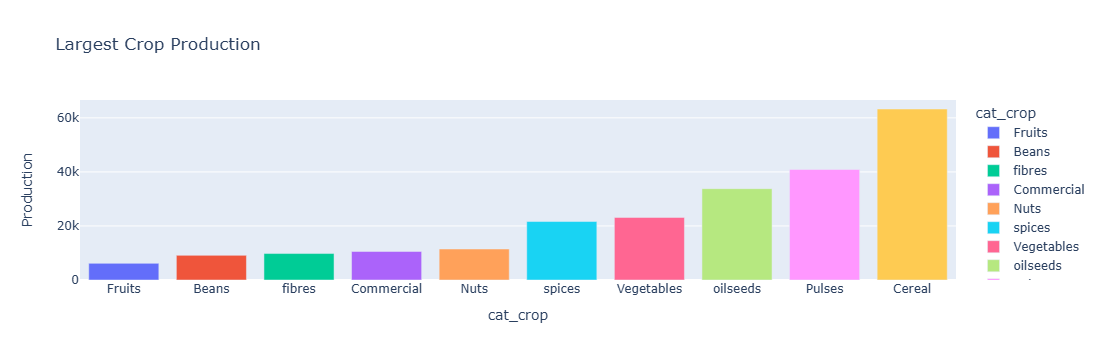

In [85]:
crop7 = crop.groupby(by='cat_crop')['Production'].count().reset_index().sort_values(by='Production')
px.bar(crop7, 'cat_crop', 'Production', color='cat_crop',title = 'Largest Crop Production')

In [86]:
#In our India,Cereals are produced more tham others.

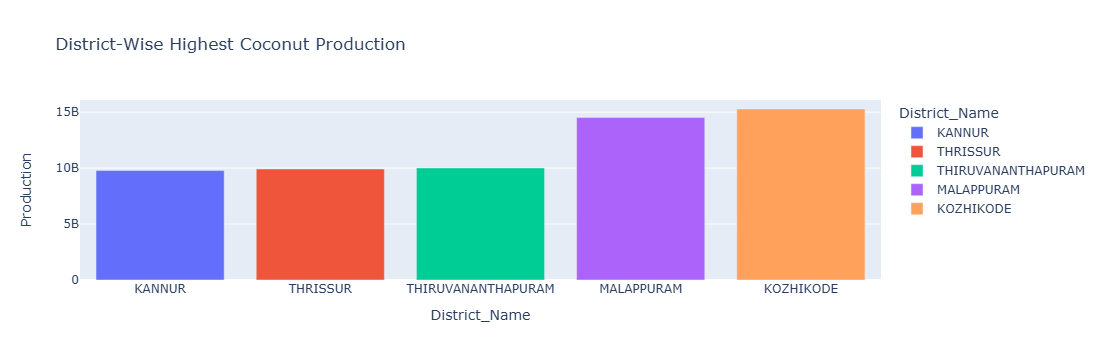

In [87]:
crop8 = coconut.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production').tail()
px.bar(crop8, 'District_Name', 'Production',color='District_Name',title = 'District-Wise Highest Coconut Production' )


In [88]:
#KOZHIKODE is the District producing more coconuts in India. 

In [89]:
#CONCLUSION
#We started with 246091 records with 7 columns.
#Production Variable had 3730 (about 1.52% of total sample size) missing values which was dropped and working dataset has 242361 sample size.
#we create new variable which is crop_category - 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibers, Beans, Fruits. 
#Dateset shows top categories are Cereal, Pulses and oilseeds. we performed Data visualization based on some Questions.